<a href="https://colab.research.google.com/github/choarauc/prophet/blob/main/prophet_avocado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [136]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import random
from bokeh.io import  push_notebook,output_notebook, show
output_notebook() 
import seaborn as sns
from fbprophet import Prophet

In [137]:
from google.colab import files 
uploaded = files.upload()

Saving avocado.csv to avocado (2).csv


Data

In [138]:
df = pd.read_csv('avocado.csv')
df

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [139]:
df = df.sort_values("Date")
df

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
11569,51,2015-01-04,1.75,27365.89,9307.34,3844.81,615.28,13598.46,13061.10,537.36,0.00,organic,2015,Southeast
9593,51,2015-01-04,1.49,17723.17,1189.35,15628.27,0.00,905.55,905.55,0.00,0.00,organic,2015,Chicago
10009,51,2015-01-04,1.68,2896.72,161.68,206.96,0.00,2528.08,2528.08,0.00,0.00,organic,2015,HarrisburgScranton
1819,51,2015-01-04,1.52,54956.80,3013.04,35456.88,1561.70,14925.18,11264.80,3660.38,0.00,conventional,2015,Pittsburgh
9333,51,2015-01-04,1.64,1505.12,1.27,1129.50,0.00,374.35,186.67,187.68,0.00,organic,2015,Boise
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8574,0,2018-03-25,1.36,908202.13,142681.06,463136.28,174975.75,127409.04,103579.41,22467.04,1362.59,conventional,2018,Chicago
9018,0,2018-03-25,0.70,9010588.32,3999735.71,966589.50,30130.82,4014132.29,3398569.92,546409.74,69152.63,conventional,2018,SouthCentral
18141,0,2018-03-25,1.42,163496.70,29253.30,5080.04,0.00,129163.36,109052.26,20111.10,0.00,organic,2018,SouthCentral
17673,0,2018-03-25,1.70,190257.38,29644.09,70982.10,0.00,89631.19,89424.11,207.08,0.00,organic,2018,California


In [140]:
# Cette fonction permet de déterminer les variables avec des valeurs manquantes
def valeur_manquante(df):
    flag=0
    for col in df.columns:
            if df[col].isna().sum() > 0:
                flag=1
                print(f'"{col}": {df[col].isna().sum()} valeur(s) manquante(s)')
    if flag==0:
        print("Le dataset ne contient plus de valeurs manquantes.")

valeur_manquante(df)

Le dataset ne contient plus de valeurs manquantes.


In [141]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18249 entries, 11569 to 8814
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 2.1+ MB


In [142]:
df.corr()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
Unnamed: 0,1.000000,-0.133008,0.014035,0.017628,0.019829,0.041752,-0.002219,0.000347,-0.009196,-0.011546,-0.171667
AveragePrice,-0.133008,1.000000,-0.192752,-0.208317,-0.172928,-0.179446,-0.177088,-0.174730,-0.172940,-0.117592,0.093197
Total Volume,0.014035,-0.192752,1.000000,0.977863,0.974181,0.872202,0.963047,0.967238,0.880640,0.747157,0.017193
4046,0.017628,-0.208317,0.977863,1.000000,0.926110,0.833389,0.920057,0.925280,0.838645,0.699377,0.003353
4225,0.019829,-0.172928,0.974181,0.926110,1.000000,0.887855,0.905787,0.916031,0.810015,0.688809,-0.009559
4770,0.041752,-0.179446,0.872202,0.833389,0.887855,1.000000,0.792314,0.802733,0.698471,0.679861,-0.036531
Total Bags,-0.002219,-0.177088,0.963047,0.920057,0.905787,0.792314,1.000000,0.994335,0.943009,0.804233,0.071552
Small Bags,0.000347,-0.174730,0.967238,0.925280,0.916031,0.802733,0.994335,1.000000,0.902589,0.806845,0.063915
Large Bags,-0.009196,-0.172940,0.880640,0.838645,0.810015,0.698471,0.943009,0.902589,1.000000,0.710858,0.087891
XLarge Bags,-0.011546,-0.117592,0.747157,0.699377,0.688809,0.679861,0.804233,0.806845,0.710858,1.000000,0.081033


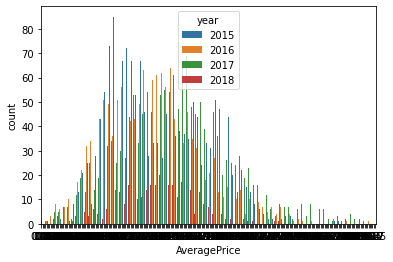

In [143]:
sns.countplot(data=df,x='AveragePrice',hue="year")

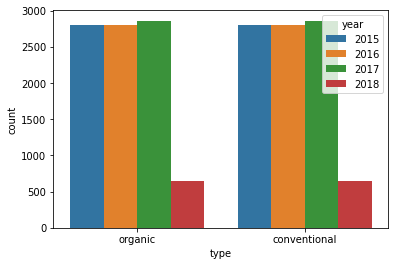

In [144]:
sns.countplot(data=df,x='type',hue="year")

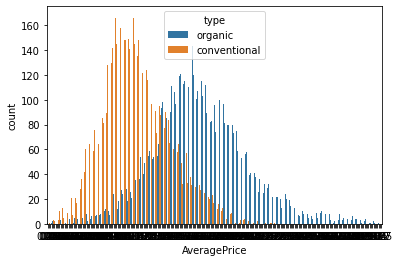

In [145]:
sns.countplot(data=df,x='AveragePrice',hue="type")

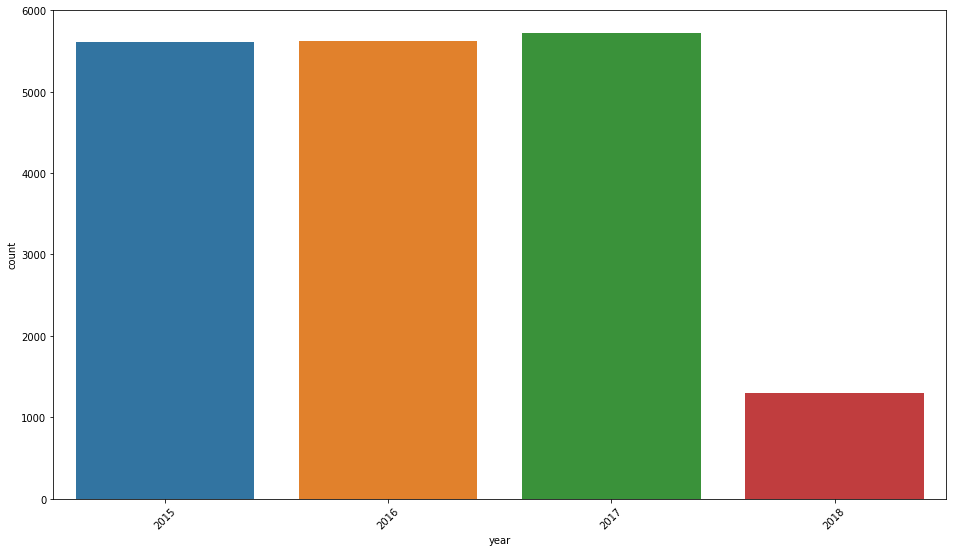

In [146]:
plt.figure(figsize=[16,9])
sns.countplot(x = 'year', data = df)
plt.xticks(rotation = 45)
plt.show()

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


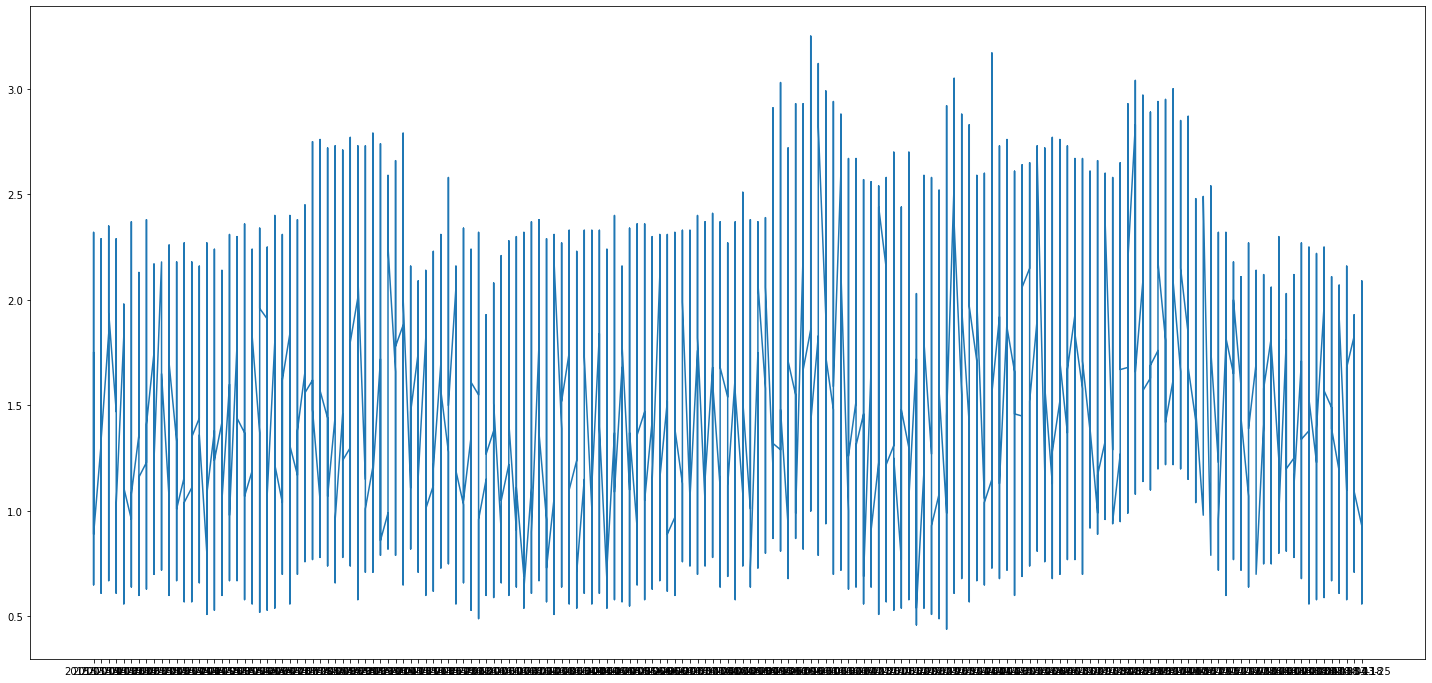

In [147]:
plt.figure(figsize=[25,12])
plt.plot(df['Date'], df['AveragePrice'])
plt.show()

In [148]:
df_prophet = df[['Date', 'AveragePrice']] 
df_prophet

,Date,AveragePrice
11569,2015-01-04,1.75
9593,2015-01-04,1.49
10009,2015-01-04,1.68
1819,2015-01-04,1.52
9333,2015-01-04,1.64
...,...,...
8574,2018-03-25,1.36
9018,2018-03-25,0.70
18141,2018-03-25,1.42
17673,2018-03-25,1.70


Prédicitions

In [149]:
df_prophet = df_prophet.rename(columns={'Date':'ds', 'AveragePrice':'y'})
df_prophet

,ds,y
11569,2015-01-04,1.75
9593,2015-01-04,1.49
10009,2015-01-04,1.68
1819,2015-01-04,1.52
9333,2015-01-04,1.64
...,...,...
8574,2018-03-25,1.36
9018,2018-03-25,0.70
18141,2018-03-25,1.42
17673,2018-03-25,1.70


In [150]:
m = Prophet()
m.fit(df_prophet)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [151]:
futur = m.make_futur_dataframe(periods=365)
forecast = m.predict(futur)
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2015-01-04,1.498818,0.896630,1.896204,1.498818,1.498818,-0.113604,-0.113604,-0.113604,-0.113604,-0.113604,-0.113604,0.0,0.0,0.0,1.385214
1,2015-01-11,1.493637,0.879717,1.858982,1.493637,1.493637,-0.105192,-0.105192,-0.105192,-0.105192,-0.105192,-0.105192,0.0,0.0,0.0,1.388445
2,2015-01-18,1.488455,0.918888,1.847551,1.488455,1.488455,-0.104862,-0.104862,-0.104862,-0.104862,-0.104862,-0.104862,0.0,0.0,0.0,1.383592
3,2015-01-25,1.483273,0.840257,1.848015,1.483273,1.483273,-0.123788,-0.123788,-0.123788,-0.123788,-0.123788,-0.123788,0.0,0.0,0.0,1.359485
4,2015-02-01,1.478091,0.840907,1.826959,1.478091,1.478091,-0.152113,-0.152113,-0.152113,-0.152113,-0.152113,-0.152113,0.0,0.0,0.0,1.325978
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
529,2019-03-21,1.161735,0.552677,1.595593,0.982416,1.349783,-0.086198,-0.086198,-0.086198,-0.086198,-0.086198,-0.086198,0.0,0.0,0.0,1.075537
530,2019-03-22,1.161003,0.538571,1.594741,0.981554,1.349442,-0.084518,-0.084518,-0.084518,-0.084518,-0.084518,-0.084518,0.0,0.0,0.0,1.076485
531,2019-03-23,1.160272,0.570164,1.627309,0.980142,1.349417,-0.082565,-0.082565,-0.082565,-0.082565,-0.082565,-0.082565,0.0,0.0,0.0,1.077707
532,2019-03-24,1.159540,0.552435,1.631633,0.978844,1.349392,-0.080358,-0.080358,-0.080358,-0.080358,-0.080358,-0.080358,0.0,0.0,0.0,1.079182


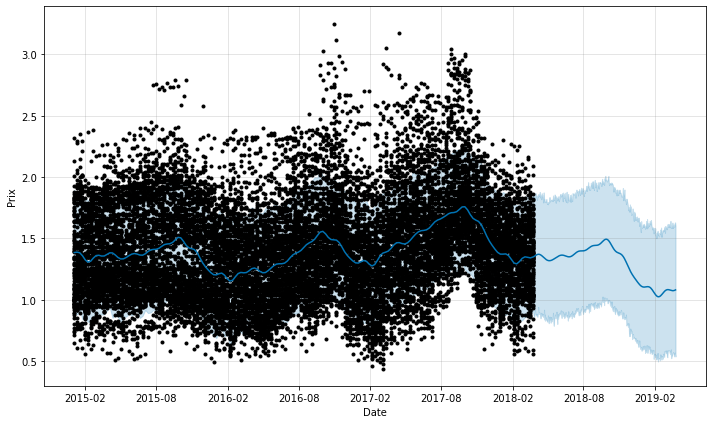

In [152]:
figure = m.plot(forecast, xlabel='Date', ylabel='Prix')

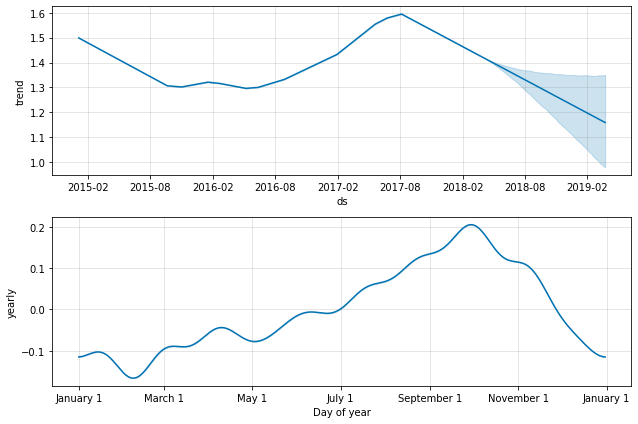

In [153]:
figure3 = m.plot_components(forecast)

# saisonnalité 

test sur 3 ans sur WEST

In [154]:
df

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
11569,51,2015-01-04,1.75,27365.89,9307.34,3844.81,615.28,13598.46,13061.10,537.36,0.00,organic,2015,Southeast
9593,51,2015-01-04,1.49,17723.17,1189.35,15628.27,0.00,905.55,905.55,0.00,0.00,organic,2015,Chicago
10009,51,2015-01-04,1.68,2896.72,161.68,206.96,0.00,2528.08,2528.08,0.00,0.00,organic,2015,HarrisburgScranton
1819,51,2015-01-04,1.52,54956.80,3013.04,35456.88,1561.70,14925.18,11264.80,3660.38,0.00,conventional,2015,Pittsburgh
9333,51,2015-01-04,1.64,1505.12,1.27,1129.50,0.00,374.35,186.67,187.68,0.00,organic,2015,Boise
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8574,0,2018-03-25,1.36,908202.13,142681.06,463136.28,174975.75,127409.04,103579.41,22467.04,1362.59,conventional,2018,Chicago
9018,0,2018-03-25,0.70,9010588.32,3999735.71,966589.50,30130.82,4014132.29,3398569.92,546409.74,69152.63,conventional,2018,SouthCentral
18141,0,2018-03-25,1.42,163496.70,29253.30,5080.04,0.00,129163.36,109052.26,20111.10,0.00,organic,2018,SouthCentral
17673,0,2018-03-25,1.70,190257.38,29644.09,70982.10,0.00,89631.19,89424.11,207.08,0.00,organic,2018,California


In [155]:
df_sample = df[df['region']=='West']
df_sample = df_sample.sort_values("Date")
df_sample

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
11881,51,2015-01-04,1.40,187548.30,70313.71,72942.11,24.30,44268.18,10023.72,34244.46,0.00,organic,2015,West
2755,51,2015-01-04,0.89,5794410.58,2275446.87,2582300.65,97024.09,839638.97,688813.01,150819.57,6.39,conventional,2015,West
11880,50,2015-01-11,1.39,223156.55,80139.16,111395.01,63.88,31558.50,9296.76,22261.74,0.00,organic,2015,West
2754,50,2015-01-11,0.95,5333097.71,2203111.92,2292761.26,127412.09,709812.44,598705.08,111073.82,33.54,conventional,2015,West
2753,49,2015-01-18,0.96,5475363.01,2431736.63,2258069.63,76348.13,709208.62,527358.78,181809.88,39.96,conventional,2015,West
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9104,2,2018-03-11,1.00,6906412.50,2442241.76,1695925.97,130983.00,2637261.77,1435608.59,1184730.56,16922.62,conventional,2018,West
18226,1,2018-03-18,1.73,210067.47,33437.98,47165.54,110.40,129353.55,73163.12,56020.24,170.19,organic,2018,West
9103,1,2018-03-18,0.99,7254940.65,2099082.66,1707752.84,115997.93,3332107.22,1333247.05,1982086.02,16774.15,conventional,2018,West
9102,0,2018-03-25,0.93,7667064.46,2567279.74,1912986.38,118289.91,3068508.43,1309580.19,1745630.06,13298.18,conventional,2018,West


INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


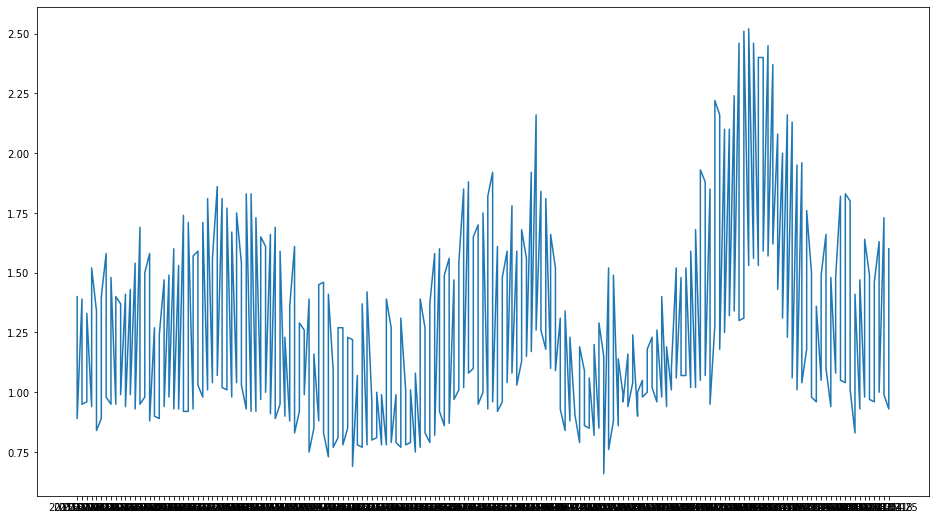

In [156]:
plt.figure(figsize=(16,9))
plt.plot(df_sample['Date'], df_sample['AveragePrice'])
plt.show()

In [157]:
df_sample = df_sample.rename(columns={'Date':'ds', 'AveragePrice':'y'})

In [158]:
m = Prophet()
m.fit(df_sample)

# Forcast

futur = m.make_futur_dataframe(periods=1095) #3 ans
forecast = m.predict(futur)
forecast

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2015-01-04,1.287867,0.700740,1.531623,1.287867,1.287867,-0.187262,-0.187262,-0.187262,-0.187262,-0.187262,-0.187262,0.0,0.0,0.0,1.100606
1,2015-01-11,1.285610,0.679310,1.536512,1.285610,1.285610,-0.171103,-0.171103,-0.171103,-0.171103,-0.171103,-0.171103,0.0,0.0,0.0,1.114507
2,2015-01-18,1.283353,0.677800,1.564872,1.283353,1.283353,-0.162536,-0.162536,-0.162536,-0.162536,-0.162536,-0.162536,0.0,0.0,0.0,1.120817
3,2015-01-25,1.281096,0.716551,1.552298,1.281096,1.281096,-0.173885,-0.173885,-0.173885,-0.173885,-0.173885,-0.173885,0.0,0.0,0.0,1.107211
4,2015-02-01,1.278838,0.675589,1.538549,1.278838,1.278838,-0.194907,-0.194907,-0.194907,-0.194907,-0.194907,-0.194907,0.0,0.0,0.0,1.083931
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1259,2021-03-20,2.132856,1.429418,2.413750,1.931513,2.327603,-0.208930,-0.208930,-0.208930,-0.208930,-0.208930,-0.208930,0.0,0.0,0.0,1.923926
1260,2021-03-21,2.133415,1.458773,2.408858,1.931633,2.328342,-0.204258,-0.204258,-0.204258,-0.204258,-0.204258,-0.204258,0.0,0.0,0.0,1.929157
1261,2021-03-22,2.133974,1.433736,2.353322,1.931754,2.329081,-0.198976,-0.198976,-0.198976,-0.198976,-0.198976,-0.198976,0.0,0.0,0.0,1.934998
1262,2021-03-23,2.134533,1.460062,2.380746,1.931875,2.329820,-0.193181,-0.193181,-0.193181,-0.193181,-0.193181,-0.193181,0.0,0.0,0.0,1.941353


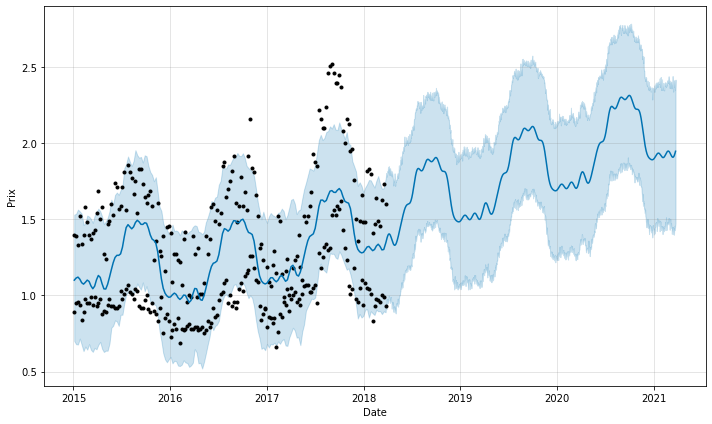

In [159]:
figure = m.plot(forecast, xlabel='Date', ylabel='Prix')

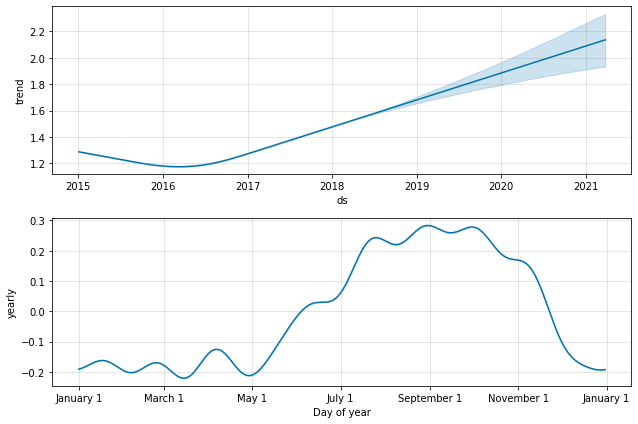

In [160]:
figure2 = m.plot_components(forecast)


test sans region sur 3 ans

In [162]:
df_sample2 = df_sample.sort_values("ds")
df_sample2

,Unnamed: 0,ds,y,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
11881,51,2015-01-04,1.40,187548.30,70313.71,72942.11,24.30,44268.18,10023.72,34244.46,0.00,organic,2015,West
2755,51,2015-01-04,0.89,5794410.58,2275446.87,2582300.65,97024.09,839638.97,688813.01,150819.57,6.39,conventional,2015,West
11880,50,2015-01-11,1.39,223156.55,80139.16,111395.01,63.88,31558.50,9296.76,22261.74,0.00,organic,2015,West
2754,50,2015-01-11,0.95,5333097.71,2203111.92,2292761.26,127412.09,709812.44,598705.08,111073.82,33.54,conventional,2015,West
2753,49,2015-01-18,0.96,5475363.01,2431736.63,2258069.63,76348.13,709208.62,527358.78,181809.88,39.96,conventional,2015,West
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9104,2,2018-03-11,1.00,6906412.50,2442241.76,1695925.97,130983.00,2637261.77,1435608.59,1184730.56,16922.62,conventional,2018,West
18226,1,2018-03-18,1.73,210067.47,33437.98,47165.54,110.40,129353.55,73163.12,56020.24,170.19,organic,2018,West
9103,1,2018-03-18,0.99,7254940.65,2099082.66,1707752.84,115997.93,3332107.22,1333247.05,1982086.02,16774.15,conventional,2018,West
9102,0,2018-03-25,0.93,7667064.46,2567279.74,1912986.38,118289.91,3068508.43,1309580.19,1745630.06,13298.18,conventional,2018,West


INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


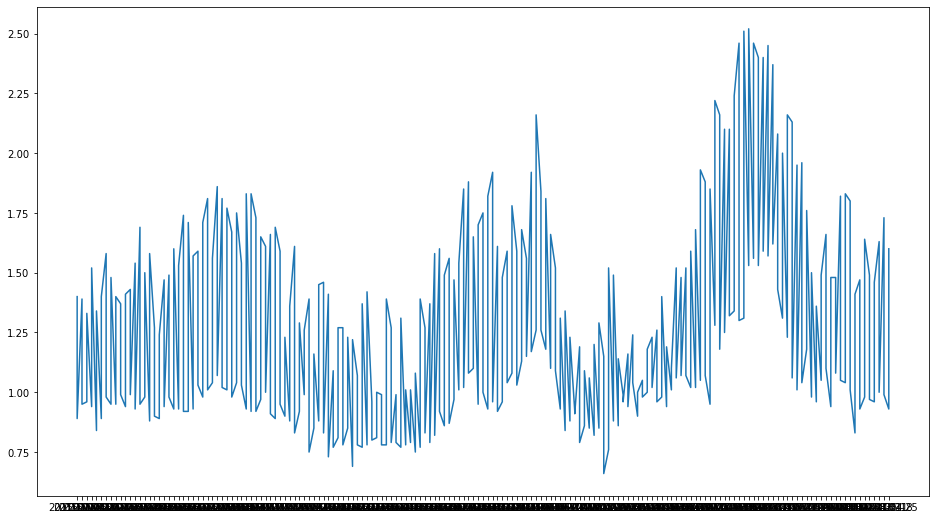

In [164]:
plt.figure(figsize=(16,9))
plt.plot(df_sample2['ds'], df_sample2['y'])
plt.show()

In [171]:
m = Prophet()
m.fit(df_sample2)

# Forcast

futur = m.make_futur_dataframe(periods=720) 
forecast = m.predict(futur)
forecast

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2015-01-04,1.286927,0.659387,1.535947,1.286927,1.286927,-0.188453,-0.188453,-0.188453,-0.188453,-0.188453,-0.188453,0.0,0.0,0.0,1.098474
1,2015-01-11,1.284678,0.693640,1.533442,1.284678,1.284678,-0.172608,-0.172608,-0.172608,-0.172608,-0.172608,-0.172608,0.0,0.0,0.0,1.112070
2,2015-01-18,1.282429,0.713884,1.518215,1.282429,1.282429,-0.164057,-0.164057,-0.164057,-0.164057,-0.164057,-0.164057,0.0,0.0,0.0,1.118372
3,2015-01-25,1.280180,0.699684,1.520633,1.280180,1.280180,-0.175364,-0.175364,-0.175364,-0.175364,-0.175364,-0.175364,0.0,0.0,0.0,1.104816
4,2015-02-01,1.277931,0.654411,1.504949,1.277931,1.277931,-0.196442,-0.196442,-0.196442,-0.196442,-0.196442,-0.196442,0.0,0.0,0.0,1.081489
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
884,2020-03-10,1.923946,1.263199,2.132553,1.834242,2.029603,-0.215799,-0.215799,-0.215799,-0.215799,-0.215799,-0.215799,0.0,0.0,0.0,1.708147
885,2020-03-11,1.924506,1.273846,2.161664,1.834699,2.030422,-0.218514,-0.218514,-0.218514,-0.218514,-0.218514,-0.218514,0.0,0.0,0.0,1.705991
886,2020-03-12,1.925066,1.276154,2.142836,1.835110,2.031232,-0.220617,-0.220617,-0.220617,-0.220617,-0.220617,-0.220617,0.0,0.0,0.0,1.704449
887,2020-03-13,1.925625,1.263009,2.161778,1.835445,2.032043,-0.222026,-0.222026,-0.222026,-0.222026,-0.222026,-0.222026,0.0,0.0,0.0,1.703599


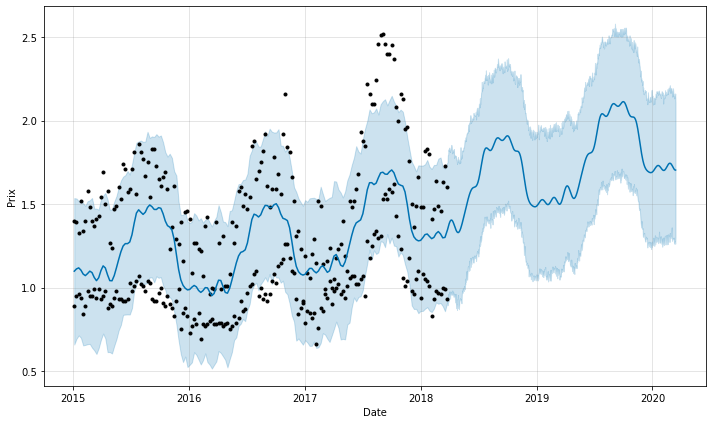

In [172]:
figure3 = m.plot(forecast, xlabel='Date', ylabel='Prix')

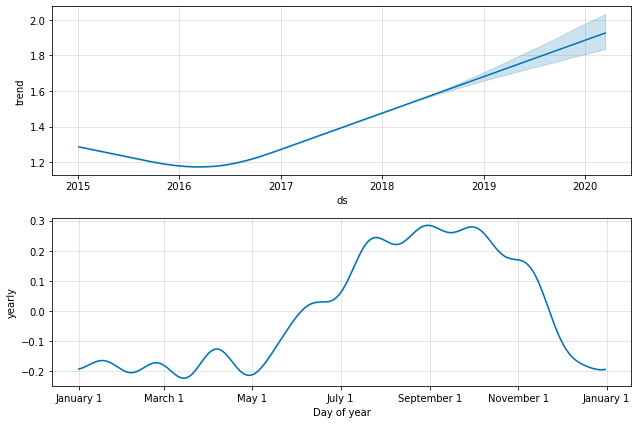

In [173]:
figure4 = m.plot_components(forecast)